In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

In [2]:
df = pd.read_csv('./data/dataset_halfSecondWindow.csv', index_col=[0])
df_5sec = pd.read_csv('./data/dataset_5secondWindow.csv', index_col=[0])


df_car = pd.read_csv('./data/categories/dataset_5secondWindow_Car.csv', index_col=[0])
df_still = pd.read_csv('./data/categories/dataset_5secondWindow_Still.csv', index_col=[0])
df_walk = pd.read_csv('./data/categories/dataset_5secondWindow_Walking.csv', index_col=[0])
df_train = pd.read_csv('./data/categories/dataset_5secondWindow_Train.csv', index_col=[0])
df_bus = pd.read_csv('./data/categories/dataset_5secondWindow_Bus.csv', index_col=[0])

df_archive = pd.read_csv('./data/archive/dataset_5secondWindow%5B1%5D.csv')


In [3]:
dataset_1 = df_5sec

In [4]:
dataset = df_archive

In [5]:
dataset.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


In [6]:
dataset.isna().sum()

time                                 0
android.sensor.accelerometer#mean    0
android.sensor.accelerometer#min     0
android.sensor.accelerometer#max     0
android.sensor.accelerometer#std     0
android.sensor.gyroscope#mean        0
android.sensor.gyroscope#min         0
android.sensor.gyroscope#max         0
android.sensor.gyroscope#std         0
sound#mean                           0
sound#min                            0
sound#max                            0
sound#std                            0
target                               0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time                               5893 non-null   float64
 1   android.sensor.accelerometer#mean  5893 non-null   float64
 2   android.sensor.accelerometer#min   5893 non-null   float64
 3   android.sensor.accelerometer#max   5893 non-null   float64
 4   android.sensor.accelerometer#std   5893 non-null   float64
 5   android.sensor.gyroscope#mean      5893 non-null   float64
 6   android.sensor.gyroscope#min       5893 non-null   float64
 7   android.sensor.gyroscope#max       5893 non-null   float64
 8   android.sensor.gyroscope#std       5893 non-null   float64
 9   sound#mean                         5893 non-null   float64
 10  sound#min                          5893 non-null   float64
 11  sound#max                          5893 non-null   float

In [8]:
dataset.sample(10)

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
2154,14.0,9.874048,7.726212,14.620443,1.208538,0.218215,0.218215,0.218215,0.413265,87.179244,87.179244,87.179244,4.490562,Bus
5697,116.0,9.743393,8.111391,10.433895,0.405199,0.065638,0.005325,0.116424,0.056159,37.501225,37.501225,37.501225,3.843737,Still
5150,52.0,9.289640,9.242642,9.365621,0.044935,0.018456,0.007453,0.034237,0.014017,71.661707,71.661707,71.661707,0.149748,Bus
4921,43.0,10.121793,6.744559,15.133408,2.634737,1.261845,0.265606,3.417680,0.883632,89.777780,89.777780,89.777780,2.704741,Walking
3568,50.0,10.014841,7.412344,12.271102,1.638527,0.185941,0.038287,0.387353,0.107597,89.753795,89.753795,89.753795,1.023191,Bus
3248,112.0,9.555550,9.473906,9.669114,0.033921,0.000000,0.000000,0.000000,0.000000,43.106721,43.106721,43.106721,1.543536,Still
948,308.0,9.961088,9.912679,10.056226,0.034589,0.027019,0.009082,0.063615,0.015429,85.278400,85.278400,85.278400,2.099441,Still
918,39.0,9.512077,7.636425,10.443875,0.718458,0.108785,0.017417,0.341443,0.074632,89.409680,89.409680,89.409680,0.000000,Bus
2449,288.0,9.830514,9.809535,9.857549,0.010326,0.002862,0.002732,0.002993,0.000184,30.370279,30.370279,30.370279,3.610098,Still
3518,33.0,9.740842,8.646573,11.218689,0.669870,0.250245,0.068367,0.380437,0.083297,89.766501,89.766501,89.766501,0.000000,Bus


In [9]:
dataset.columns

Index(['time', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean',
       'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max',
       'android.sensor.gyroscope#std', 'sound#mean', 'sound#min', 'sound#max',
       'sound#std', 'target'],
      dtype='object')

In [10]:
dataset.isna().sum()

time                                 0
android.sensor.accelerometer#mean    0
android.sensor.accelerometer#min     0
android.sensor.accelerometer#max     0
android.sensor.accelerometer#std     0
android.sensor.gyroscope#mean        0
android.sensor.gyroscope#min         0
android.sensor.gyroscope#max         0
android.sensor.gyroscope#std         0
sound#mean                           0
sound#min                            0
sound#max                            0
sound#std                            0
target                               0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

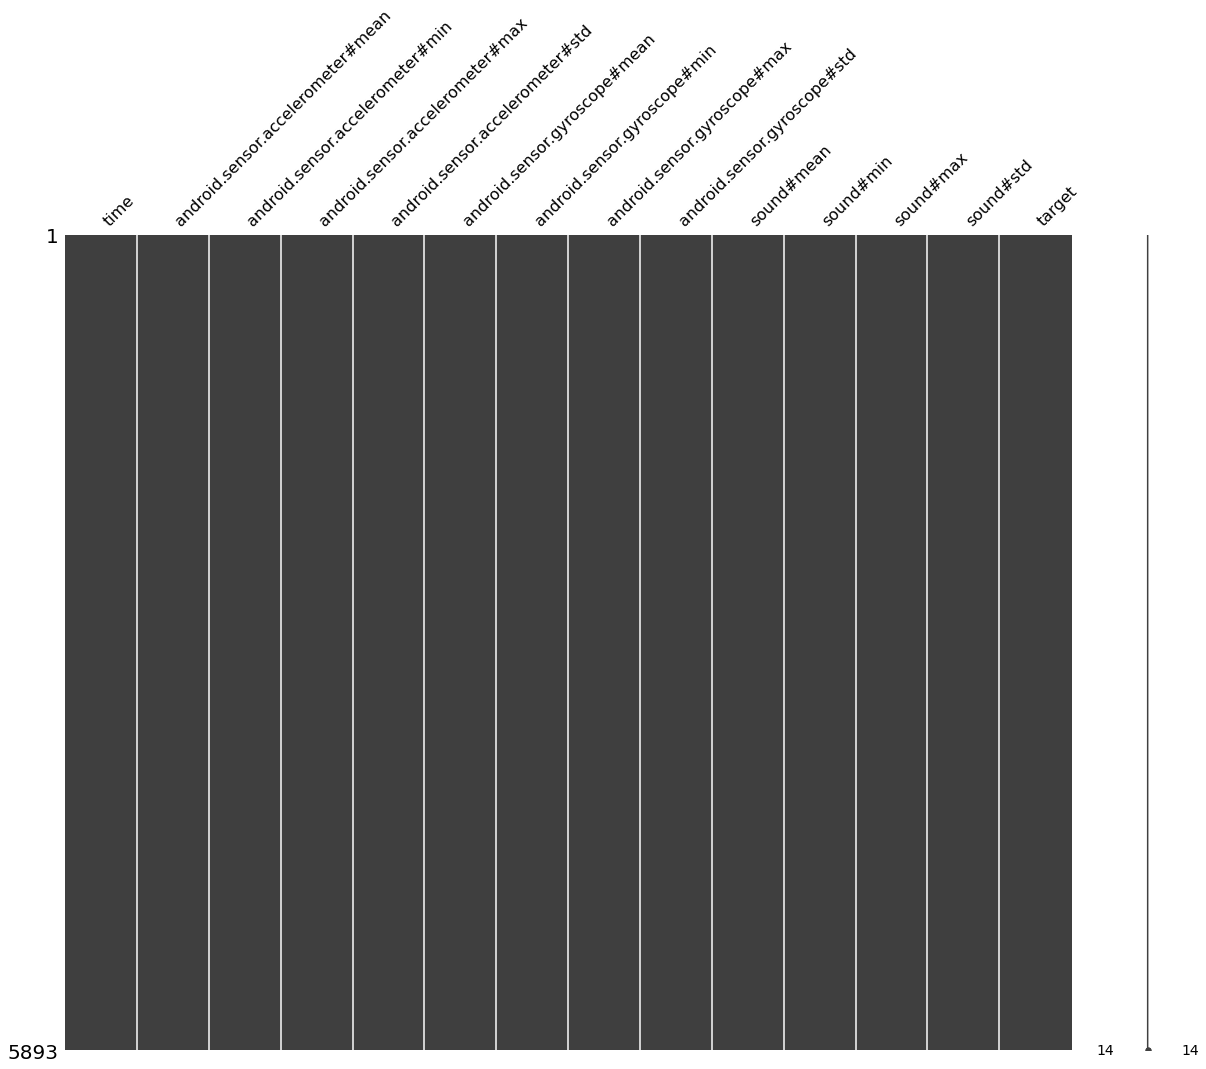

In [12]:
missingno.matrix(dataset, figsize = (20,15))
plt.show()

In [13]:
to_drop = [i for i in dataset.columns if '#std' in i]
dataset.drop(to_drop, axis=1, inplace=True)
dataset.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,sound#mean,sound#min,sound#max,target
0,78.0,9.811476,9.758895,9.849411,0.001651,0.000000,0.003533,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,0.036326,0.011669,0.059388,89.200210,89.065143,89.335277,Car
2,150.0,9.827178,9.804817,9.849262,0.001525,0.000000,0.002609,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.036440,0.020463,0.052512,87.470377,87.470377,87.470377,Car
4,77.0,9.993466,8.965621,10.891645,0.183202,0.020667,0.380875,89.770732,89.770732,89.770732,Car


In [14]:
# Rename columns
dataset.columns = dataset.columns.str.replace('android.sensor.','').str.replace('#','_')
dataset.head()

<ipython-input-14-d37d07051945>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.columns = dataset.columns.str.replace('android.sensor.','').str.replace('#','_')


,time,accelerometer_mean,accelerometer_min,accelerometer_max,gyroscope_mean,gyroscope_min,gyroscope_max,sound_mean,sound_min,sound_max,target
0,78.0,9.811476,9.758895,9.849411,0.001651,0.000000,0.003533,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,0.036326,0.011669,0.059388,89.200210,89.065143,89.335277,Car
2,150.0,9.827178,9.804817,9.849262,0.001525,0.000000,0.002609,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.036440,0.020463,0.052512,87.470377,87.470377,87.470377,Car
4,77.0,9.993466,8.965621,10.891645,0.183202,0.020667,0.380875,89.770732,89.770732,89.770732,Car


In [15]:
corr = dataset.corr()
corr.style.background_gradient(cmap='cividis')

,time,accelerometer_mean,accelerometer_min,accelerometer_max,gyroscope_mean,gyroscope_min,gyroscope_max,sound_mean,sound_min,sound_max
time,1.000000,-0.029051,0.251470,-0.146154,-0.126482,-0.112654,-0.113816,0.044498,0.045076,0.044202
accelerometer_mean,-0.029051,1.000000,-0.350705,0.713901,0.588871,0.420045,0.529729,-0.014534,-0.013587,-0.015461
accelerometer_min,0.251470,-0.350705,1.000000,-0.701526,-0.668440,-0.520060,-0.603811,0.031618,0.030754,0.032156
accelerometer_max,-0.146154,0.713901,-0.701526,1.000000,0.714573,0.527488,0.640063,-0.106330,-0.105500,-0.106968
gyroscope_mean,-0.126482,0.588871,-0.668440,0.714573,1.000000,0.779356,0.919166,0.018677,0.020054,0.017313
gyroscope_min,-0.112654,0.420045,-0.520060,0.527488,0.779356,1.000000,0.595284,-0.025391,-0.025231,-0.025596
gyroscope_max,-0.113816,0.529729,-0.603811,0.640063,0.919166,0.595284,1.000000,0.038409,0.040072,0.036918
sound_mean,0.044498,-0.014534,0.031618,-0.106330,0.018677,-0.025391,0.038409,1.000000,0.999321,0.999304
sound_min,0.045076,-0.013587,0.030754,-0.105500,0.020054,-0.025231,0.040072,0.999321,1.000000,0.997305
sound_max,0.044202,-0.015461,0.032156,-0.106968,0.017313,-0.025596,0.036918,0.999304,0.997305,1.000000


/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

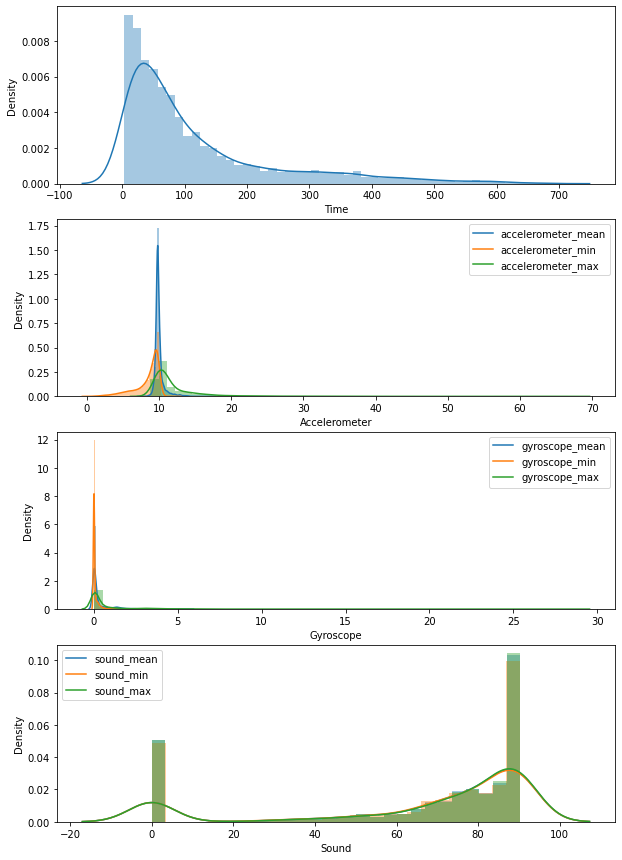

In [16]:
plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
sns.distplot(dataset.iloc[:,0])
plt.xlabel('Time')

plt.subplot(4,1,2)
for i in range(1,4):
    sns.distplot(dataset.iloc[:,i])
plt.legend(dataset.iloc[:,1:4].columns)
plt.xlabel('Accelerometer')

plt.subplot(4,1,3)
for i in range(4,7):
    sns.distplot(dataset.iloc[:,i])
plt.legend(dataset.iloc[:,4:7].columns)
plt.xlabel('Gyroscope')

plt.subplot(4,1,4)
for i in range(7,10):
    sns.distplot(dataset.iloc[:,i])
plt.legend(dataset.iloc[:,7:10].columns)
plt.xlabel('Sound')

plt.show()

In [17]:
# remove sound_min e sound_max
dataset.drop(['sound_max','sound_min'],axis=1,inplace=True)
dataset.sample(10)

,time,accelerometer_mean,accelerometer_min,accelerometer_max,gyroscope_mean,gyroscope_min,gyroscope_max,sound_mean,target
4249,260.0,9.876736,9.721515,9.988063,0.009421,0.005183,0.013659,81.348113,Still
2545,4.0,9.723683,9.580235,10.859513,0.017120,0.005947,0.052625,83.926840,Bus
1005,108.0,10.216582,10.020592,10.432408,0.024975,0.005875,0.047288,89.765090,Train
2814,72.0,9.787844,7.935394,11.273638,0.181572,0.038492,0.981394,89.660614,Car
1129,385.0,9.812531,9.682952,9.902228,0.001728,0.001728,0.001728,0.000000,Still
1856,122.0,9.596614,9.586241,9.616232,0.011877,0.001807,0.022577,86.920014,Bus
4611,218.0,10.191925,10.045761,10.521820,0.022382,0.000474,0.054213,89.749272,Train
3014,32.0,9.783229,9.139945,10.519596,0.028600,0.028600,0.028600,76.334104,Bus
4765,344.0,9.719591,8.084311,10.356767,0.044101,0.022160,0.066041,0.000000,Still
3284,3.0,9.793014,9.581064,10.072230,0.029327,0.013889,0.041381,67.948371,Car


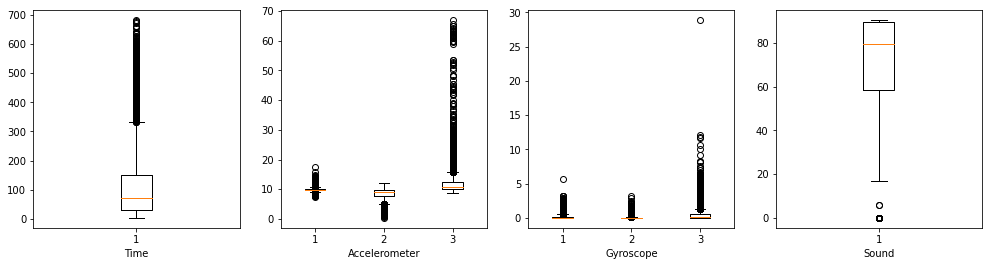

In [18]:
# using boxplot to check outliers

plt.figure(figsize=(17,4))

plt.subplot(141)
plt.boxplot(dataset.iloc[:,0])
plt.xlabel('Time')

plt.subplot(142)
plt.boxplot([dataset.iloc[:,1],dataset.iloc[:,2],dataset.iloc[:,3]])
plt.xlabel('Accelerometer')

plt.subplot(143)
plt.boxplot([dataset.iloc[:,4],dataset.iloc[:,5],dataset.iloc[:,6]])
plt.xlabel('Gyroscope')

plt.subplot(144)
plt.boxplot(dataset.iloc[:,7]);
plt.xlabel('Sound')

plt.show()